In [18]:
!pip install zxcvbn-python

In [19]:
from zxcvbn import zxcvbn

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

**Insights from the Data:**



**1. Strength Distribution:** The distribution of password strength in the dataset shows that it's not normally distributed. It appears to be skewed, with a noticeable concentration towards certain strength levels.



**2. Password Length:** Password lengths vary widely, with a range from 4 to 63 characters. The distribution suggests that shorter passwords are more common, but there are also longer passwords present.



**3. Password Complexity Metrics:**



- **Entropy and Password Strength:** There is a strong positive correlation between password entropy and password strength. Stronger passwords tend to have higher entropy values.



- **Character Types:** The number of uppercase letters, lowercase letters, numbers, and special characters varies across passwords. Analyzing their distributions reveals patterns in password complexity.



**4. Crack Time vs. Strength:** There is a strong positive correlation between password strength and the estimated crack time ('crack_time_sec'). Stronger passwords are associated with longer crack times, indicating improved security.



**5. Categorical 'crack_time':** The categorical variable 'crack_time' appears to have a good relationship with password strength. Certain categories might represent different password policies or security levels.



**6. Duplicate Passwords:** A significant number of duplicate passwords (75000 duplicates) are present in the dataset.



**7. Class Strength Classification:** The data includes a column named "class_strength," categorizing password strength into five classes: "very weak," "weak," "normal," "strong," and "very strong."



**8. Feature Engineering:** Derived features such as 'strength_points,' 'num_numbers,' 'num_special_characters,' 'num_uppercase,' 'num_lowercase,' and 'crack_time_category' have been created to capture password complexity and crack time categories.



**9. Data Types:** The dataset comprises float64, int64, and object data types. Proper data type handling and encoding may be necessary for model development.



**10. Correlations:** The correlation matrix reveals strong positive correlations between 'strength' and various password complexity metrics. These correlations can be leveraged for predictive modeling.



**11. Outliers:** Several outliers are present in the dataset, particularly in the 'crack_time_sec' and 'num_special_characters' columns.



**12. Contradictions Between class_strength and crack_time:** Contradictory combinations of class_strength and crack_time were identified in some rows, and these rows have been removed from the dataset to ensure data consistency and accuracy.

In [21]:
df_1 = pd.read_csv('/content/passwords1.csv')
pd.options.display.float_format = '{:.10f}'.format
df_1

,password,strength,length,class_strength,entropy,crack_time_sec,crack_time
0,bybee,0.0880534722,5,Very week,11.6096404744,0.0000015625,instant
1,n3m0,0.0888888888,4,Very week,8.0000000000,0.0000001280,instant
2,2509,0.0888888888,4,Very week,8.0000000000,0.0000001280,instant
3,4622,0.0704427777,4,Very week,8.0000000000,0.0000001280,instant
4,shrk,0.0888888888,4,Very week,8.0000000000,0.0000001280,instant
...,...,...,...,...,...,...,...
99995,sifelizestasdecirmeloquerras,0.9321498088,28,Very strong,134.6059378176,16572761556626810434435218931712.0000000000,Eternity
99996,iwillalwayslovemyboyfriend,0.9150393118,26,Very strong,122.2114326717,3078059790103566716919349248.0000000000,Eternity
99997,letsyouupdateyourfunNotesandmore,0.9567269822,32,Very strong,160.0000000000,730750818665451504614166361917959962624.0000000000,Eternity
99998,chocolatesoeusi912134741,0.9002406370,24,Very strong,110.0391000173,666867888425147329150976.0000000000,Eternity


In [22]:
df_1.columns

Index(['password', 'strength', 'length', 'class_strength', 'entropy',
       'crack_time_sec', 'crack_time'],
      dtype='object')

# Data Exploration & Cleaning

In [23]:
df_1.describe()

,strength,length,entropy,crack_time_sec
count,100000.0000000000,100000.0000000000,100000.0000000000,100000.0000000000
mean,0.4959611235,13.6191600000,53.8054842548,46195300130732877101709467757004167637353857044...
std,0.2785776044,7.1036374845,38.7629317828,72187656229807939182587044806271337733476034125...
min,0.0000000000,4.0000000000,8.0000000000,0.0000001280
25%,0.2495426595,8.0000000000,24.0000000000,0.0083886080
50%,0.5076245971,12.0000000000,43.0195500087,4458.0502241280
75%,0.7263942163,17.0000000000,69.4868683013,413620130943.1679077148
max,0.9994797814,63.0000000000,376.5686351805,11413651817348578934356368838527610666217231407...


In [24]:
df_1.duplicated().sum()

75000

In [25]:
df_1['password'].nunique()

25000

In [26]:
df_1=df_1.drop_duplicates()

In [27]:
df_1.isnull().sum()

password          0
strength          0
length            0
class_strength    0
entropy           0
crack_time_sec    0
crack_time        0
dtype: int64

In [28]:
df = df_1.copy()  # Create a copy of the original DataFrame

In [29]:
# Group the DataFrame by 'class_strength'
groups = df.groupby("class_strength")

# Iterate through each group
for name, group in groups:
    # Extract unique 'crack_time' values within each group
    unique_class_strengths = group["crack_time"].unique()

    # Print the unique 'crack_time' values for each 'class_strength'
    print(f"{name}: {unique_class_strengths}")

Average: ['3.00 hours' '4.00 minutes' '3.00 days' '4.00 months' '8.00 years'
 '4.00 centuries' '133.00 centuries' '6240.00 centuries']
Strong: ['8.00 years' '4.00 centuries' '4.00 months' '6240.00 centuries'
 '133.00 centuries' '3.00 days' '313678.00 centuries' 'Eternity']
Very strong: ['Eternity' '313678.00 centuries' '6240.00 centuries']
Very week: ['instant' '8.00 years' 'Eternity' '4.00 minutes' '4.00 months'
 '4.00 centuries' '3.00 days' '5.00 seconds' '313678.00 centuries']
Week: ['instant' '5.00 seconds' '3.00 days' '4.00 minutes' '3.00 hours'
 '8.00 years' '4.00 months']


In [30]:
# Create a dictionary 'desired_values' where keys are class_strength categories
# and values are lists of crack_time values you want to retain for each category.
desired_values = {
    'Average': ['3.00 hours', '3.00 days', '4.00 months', '8.00 years'],
    'Strong': ['8.00 years', '4.00 centuries', '4.00 months', '6240.00 centuries', '133.00 centuries', '3.00 days', '313678.00 centuries', 'Eternity'],
    'Very strong': ['Eternity', '313678.00 centuries', '6240.00 centuries'],
    'Very week': ['instant', '4.00 minutes', '5.00 seconds'],
    'Week': ['instant', '5.00 seconds', '3.00 days', '4.00 minutes', '3.00 hours']
}

# Iterate through the data and retain rows with desired crack_time values
for class_strength, values_to_keep in desired_values.items():
    # Create a mask to filter rows that match the class_strength but not in values_to_keep
    mask = (df['class_strength'] == class_strength) & (~df['crack_time'].isin(values_to_keep))
    # Update the DataFrame by dropping rows that match the mask
    df = df[~mask]

In [31]:
# Display the modified data after filtering unwanted rows
groups = df.groupby("class_strength")

for name, group in groups:
    unique_class_strengths = group["crack_time"].unique()
    print(f"{name}: {unique_class_strengths}")

Average: ['3.00 hours' '3.00 days' '4.00 months' '8.00 years']
Strong: ['8.00 years' '4.00 centuries' '4.00 months' '6240.00 centuries'
 '133.00 centuries' '3.00 days' '313678.00 centuries' 'Eternity']
Very strong: ['Eternity' '313678.00 centuries' '6240.00 centuries']
Very week: ['instant' '4.00 minutes' '5.00 seconds']
Week: ['instant' '5.00 seconds' '3.00 days' '4.00 minutes' '3.00 hours']


## Feature Engineering

In [32]:
# Create a custom function for evaluating password strength
def evaluate_password_strength(password):
    return zxcvbn(password)['score']

# Apply the function to the entire 'password' column
df['password_strength'] = np.vectorize(evaluate_password_strength)(df['password'])

In [33]:
def evaluate_password_strength(password):
    points = 0

    # Check for lowercase letters
    if any(c.islower() for c in password):
        points += 2

    # Check for uppercase letters
    if any(c.isupper() for c in password):
        points += 2

    # Check for digits (numbers)
    if any(c.isdigit() for c in password):
        points += 2

    # Check for special characters
    special_characters = re.compile(r'[!@#$%^&*(),.?":{}|<>]')
    if special_characters.search(password):
        points += 2

    # Check for length
    if len(password) >= 8:
        points += 2

    # Check for the number of unique characters
    unique_chars = len(set(password))

    if unique_chars <= 3:
        points -= 2
    elif unique_chars <= 5:
        points += 2
    elif unique_chars <= 7:
        points += 4
    else:
        points += 6

    # Ensure the minimum score is 0 (to prevent negative scores)
    return max(points, 0)

# Apply the password strength evaluation function to create a new 'strength_points' column
df['strength_points'] = df['password'].apply(evaluate_password_strength)


In [34]:
# Count the number of digits in the password
df['num_numbers'] = df['password'].apply(lambda x: sum(c.isdigit() for c in x))

# Count the number of special characters characters in the password
df['num_special_characters'] = df['password'].apply(lambda x: sum(not c.isalnum() for c in x))

# Count the number of uppercase letters in the password
df['num_uppercase'] = df['password'].apply(lambda x: sum(c.isupper() for c in x))

# Count the number of lowercase letters in the password
df['num_lowercase'] = df['password'].apply(lambda x: sum(c.islower() for c in x))

# Drop the 'password' column from the DataFrame
df = df.drop(columns=['password'])

## Data Preprocessing

In [35]:
# Categorize 'crack_time_sec' into quantile-based categories
df['crack_time_category'] = pd.qcut(df['crack_time_sec'], q=15, labels=False) + 1

# Drop the original 'crack_time_sec' column since it's replaced by categories
df = df.drop(columns=['crack_time_sec'])

In [36]:
# Identify categorical columns (containing object and category data types)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for i in categorical_columns:
    print(i,df[i].nunique())


# Identify numerical columns (containing int and float data types)

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for i in numerical_columns:
    print(i,df[i].nunique())

class_strength 5
crack_time 12
strength 482
length 58
entropy 58
password_strength 5
strength_points 9
num_numbers 49
num_special_characters 15
num_uppercase 39
num_lowercase 57
crack_time_category 15


# Data visualization

In [37]:
df.describe()

,strength,length,entropy,password_strength,strength_points,num_numbers,num_special_characters,num_uppercase,num_lowercase,crack_time_category
count,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000,23708.0000000000
mean,0.4996943013,13.7270963388,54.4634771721,2.7354479501,9.2800742365,3.3119622069,0.0591361566,0.6075164501,9.7484815252,7.7667032225
std,0.2851041539,7.2286191139,39.3614830669,1.2615974761,3.6568570285,4.4224104369,0.4819731343,2.7001945797,7.7120128479,4.3728968661
min,0.0000000000,4.0000000000,8.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
25%,0.2297744443,8.0000000000,24.0000000000,1.0000000000,8.0000000000,0.0000000000,0.0000000000,0.0000000000,4.0000000000,4.0000000000
50%,0.5213678849,13.0000000000,48.1057163358,3.0000000000,10.0000000000,2.0000000000,0.0000000000,0.0000000000,8.0000000000,8.0000000000
75%,0.7414243047,18.0000000000,75.0586500260,4.0000000000,12.0000000000,5.0000000000,0.0000000000,0.0000000000,14.0000000000,12.0000000000
max,0.9994797814,63.0000000000,376.5686351805,4.0000000000,16.0000000000,62.0000000000,32.0000000000,45.0000000000,63.0000000000,15.0000000000


In [38]:
df.head()

,strength,length,class_strength,entropy,crack_time,password_strength,strength_points,num_numbers,num_special_characters,num_uppercase,num_lowercase,crack_time_category
0,0.0880534722,5,Very week,11.6096404744,instant,1,0,0,0,0,5,1
1,0.0888888888,4,Very week,8.0000000000,instant,1,6,2,0,0,2,1
2,0.0888888888,4,Very week,8.0000000000,instant,1,4,4,0,0,0,1
3,0.0704427777,4,Very week,8.0000000000,instant,1,0,4,0,0,0,1
4,0.0888888888,4,Very week,8.0000000000,instant,1,4,0,0,0,4,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23708 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   strength                23708 non-null  float64
 1   length                  23708 non-null  int64  
 2   class_strength          23708 non-null  object 
 3   entropy                 23708 non-null  float64
 4   crack_time              23708 non-null  object 
 5   password_strength       23708 non-null  int64  
 6   strength_points         23708 non-null  int64  
 7   num_numbers             23708 non-null  int64  
 8   num_special_characters  23708 non-null  int64  
 9   num_uppercase           23708 non-null  int64  
 10  num_lowercase           23708 non-null  int64  
 11  crack_time_category     23708 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 2.4+ MB


In [40]:
df.columns

Index(['strength', 'length', 'class_strength', 'entropy', 'crack_time',
       'password_strength', 'strength_points', 'num_numbers',
       'num_special_characters', 'num_uppercase', 'num_lowercase',
       'crack_time_category'],
      dtype='object')

In [41]:
# Create a crosstab to get the counts of each combination
ct = pd.crosstab(df['crack_time'], df['class_strength'])

# Reset the index to make 'crack_time' a regular column
ct.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for plotting
melted_ct = pd.melt(ct, id_vars='crack_time', value_vars=df['class_strength'].unique(), var_name='class_strength', value_name='Count')

# Define the custom order for crack_time
custom_order = ["instant","5.00 seconds","4.00 minutes","3.00 hours","3.00 days","4.00 months","8.00 years","4.00 centuries","133.00 centuries","6240.00 centuries","313678.00 centuries","Eternity"]

# Convert crack_time to a categorical column with custom order
melted_ct['crack_time'] = pd.Categorical(melted_ct['crack_time'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
melted_ct = melted_ct.sort_values('crack_time')

# Create the interactive bar plot
fig1 = px.bar(melted_ct, x='crack_time', y='Count', color='class_strength',
             labels={'crack_time': 'Crack Time', 'Count': 'Count of Passwords'},
             title='Distribution of Class Strength by Crack Time')

# Create a DataFrame showing the count of records for each class_strength value
class_strength_counts = df['class_strength'].value_counts().reset_index()

# Prepare data for the pie chart
fig2 = px.pie(class_strength_counts, names='index', values='class_strength', title='Distribution of Class Strength')

# Customize the appearance of the pie chart
fig2.update_traces(
    textinfo='percent+label',  # Display both percentage and labels on the slices
    pull=[0.07, 0.07, 0.07, 0.07, 0.07],  # Pull the slices out to make them more prominent
    hoverinfo='label+percent',  # Display label and percentage on hover
)

# Create two separate figures
fig2.show()
fig1.show()


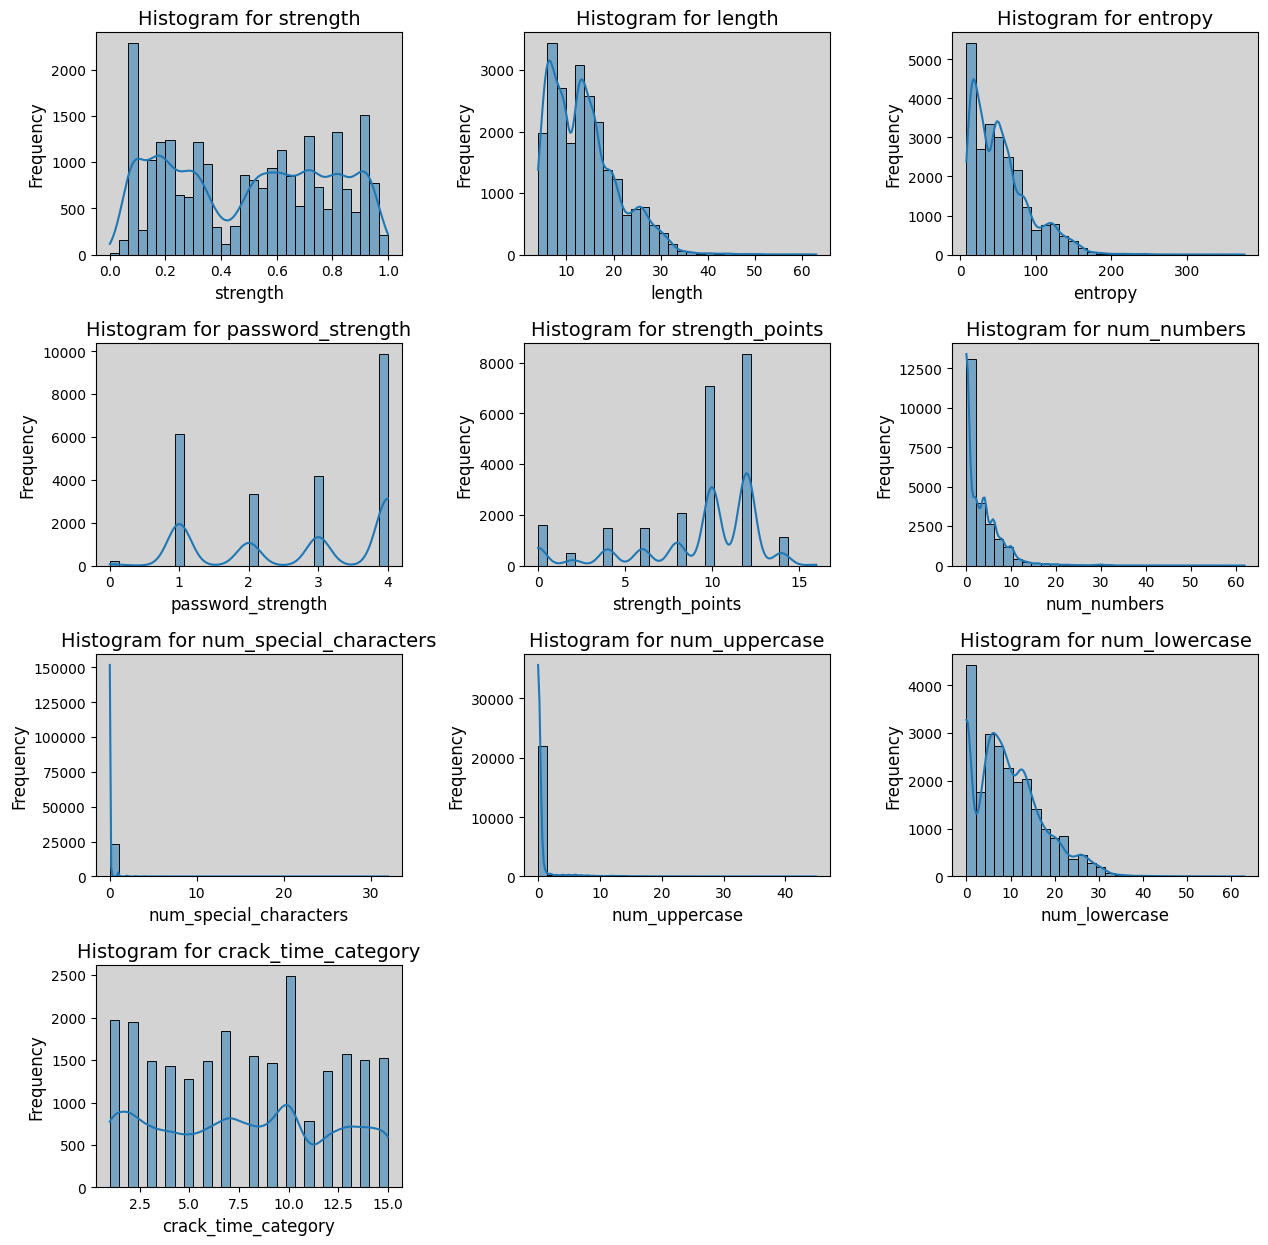

In [42]:
# Set the figure size
plt.figure(figsize=(15, 15))

# Set the background color to a custom color (e.g., light gray)
plt.rcParams['axes.facecolor'] = 'lightgray'

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot a histogram for each numerical column using histplot
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns

# Iterate through numerical columns
for i, col in enumerate(numerical_cols, 1):
    # Create a subplot for each column in a 3x3 grid
    plt.subplot(4, 3, i)

    # Plot a histogram with specified number of bins and density distribution
    sns.histplot(data=df, x=col, bins=30, kde=True)

    # Set the plot title
    plt.title(f'Histogram for {col}', fontsize=14)

    # Label the x-axis
    plt.xlabel(col, fontsize=12)

    # Label the y-axis
    plt.ylabel('Frequency', fontsize=12)

# Display the plots
plt.show()


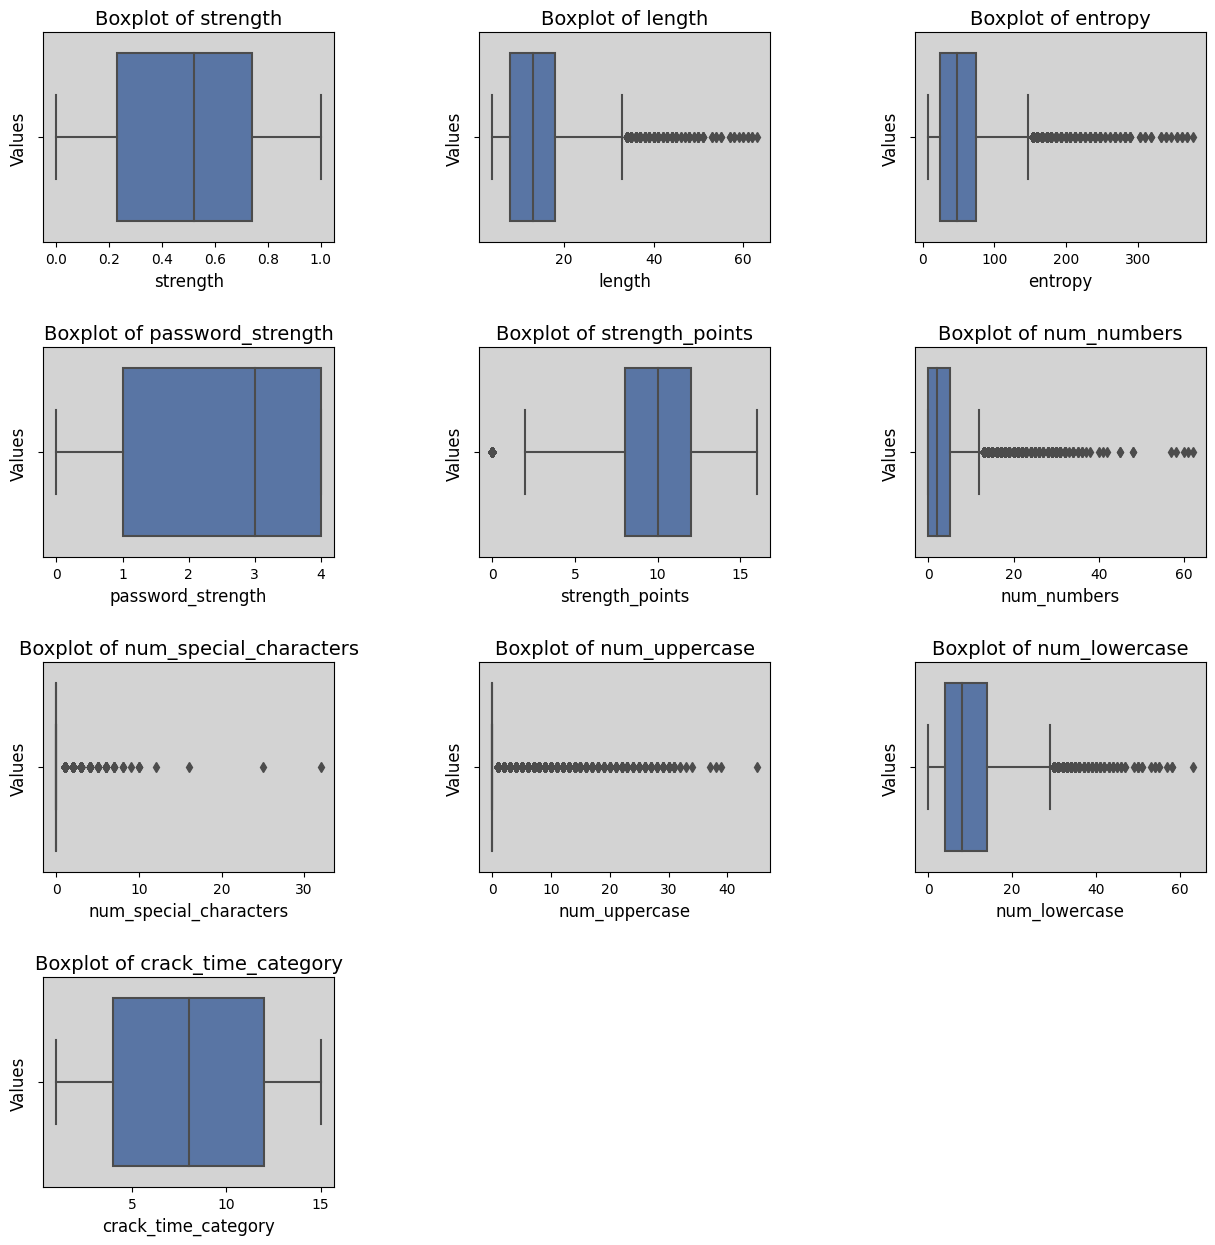

In [43]:
# Set the figure size and adjust spacing between subplots
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot a boxplot for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns

# Define a blue color palette ('Blues' in this case)
color_palette = sns.color_palette("deep")

# Iterate through numerical columns
for i, col in enumerate(numerical_cols, 1):
    # Create a subplot for each column in a 3x3 grid
    plt.subplot(4, 3, i)

    # Create a boxplot for the current column with the blue color palette
    sns.boxplot(x=df[col], palette=color_palette)

    # Set labels and title for the subplot
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)

# Display the boxplots
plt.show()


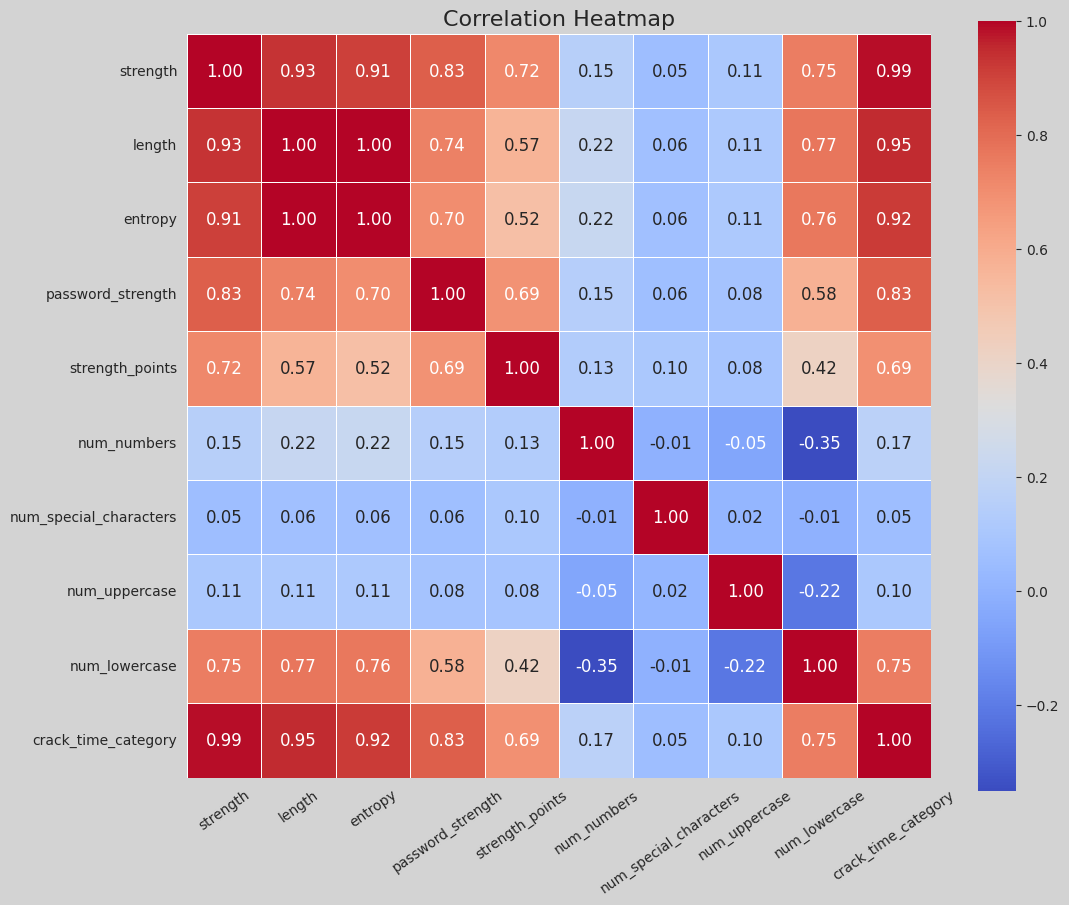

In [44]:
# Set a custom color palette with more contrast
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Set a custom style
sns.set_style("whitegrid")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10), facecolor='lightgray')  # Set background color to light gray

# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap with annotations using seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show values in each cell
    cmap=custom_palette,   # Custom color palette
    linewidths=0.5,       # Line width between cells
    square=True,           # Make the cells square
    cbar=True,             # Show the color bar
    cbar_kws={'orientation': 'vertical'},  # Customize color bar orientation
    fmt='.2f',             # Format for displaying values (2 decimal places)
    annot_kws={"size": 12},  # Adjust font size for annotations
    xticklabels=True,      # Show x-axis labels
    yticklabels=True,      # Show y-axis labels
)

# Set the title of the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=35)
plt.yticks(rotation=0)

# Add more space at the top and bottom of the heatmap
plt.subplots_adjust(top=0.92, bottom=0.15)

# Display the heatmap
plt.show()


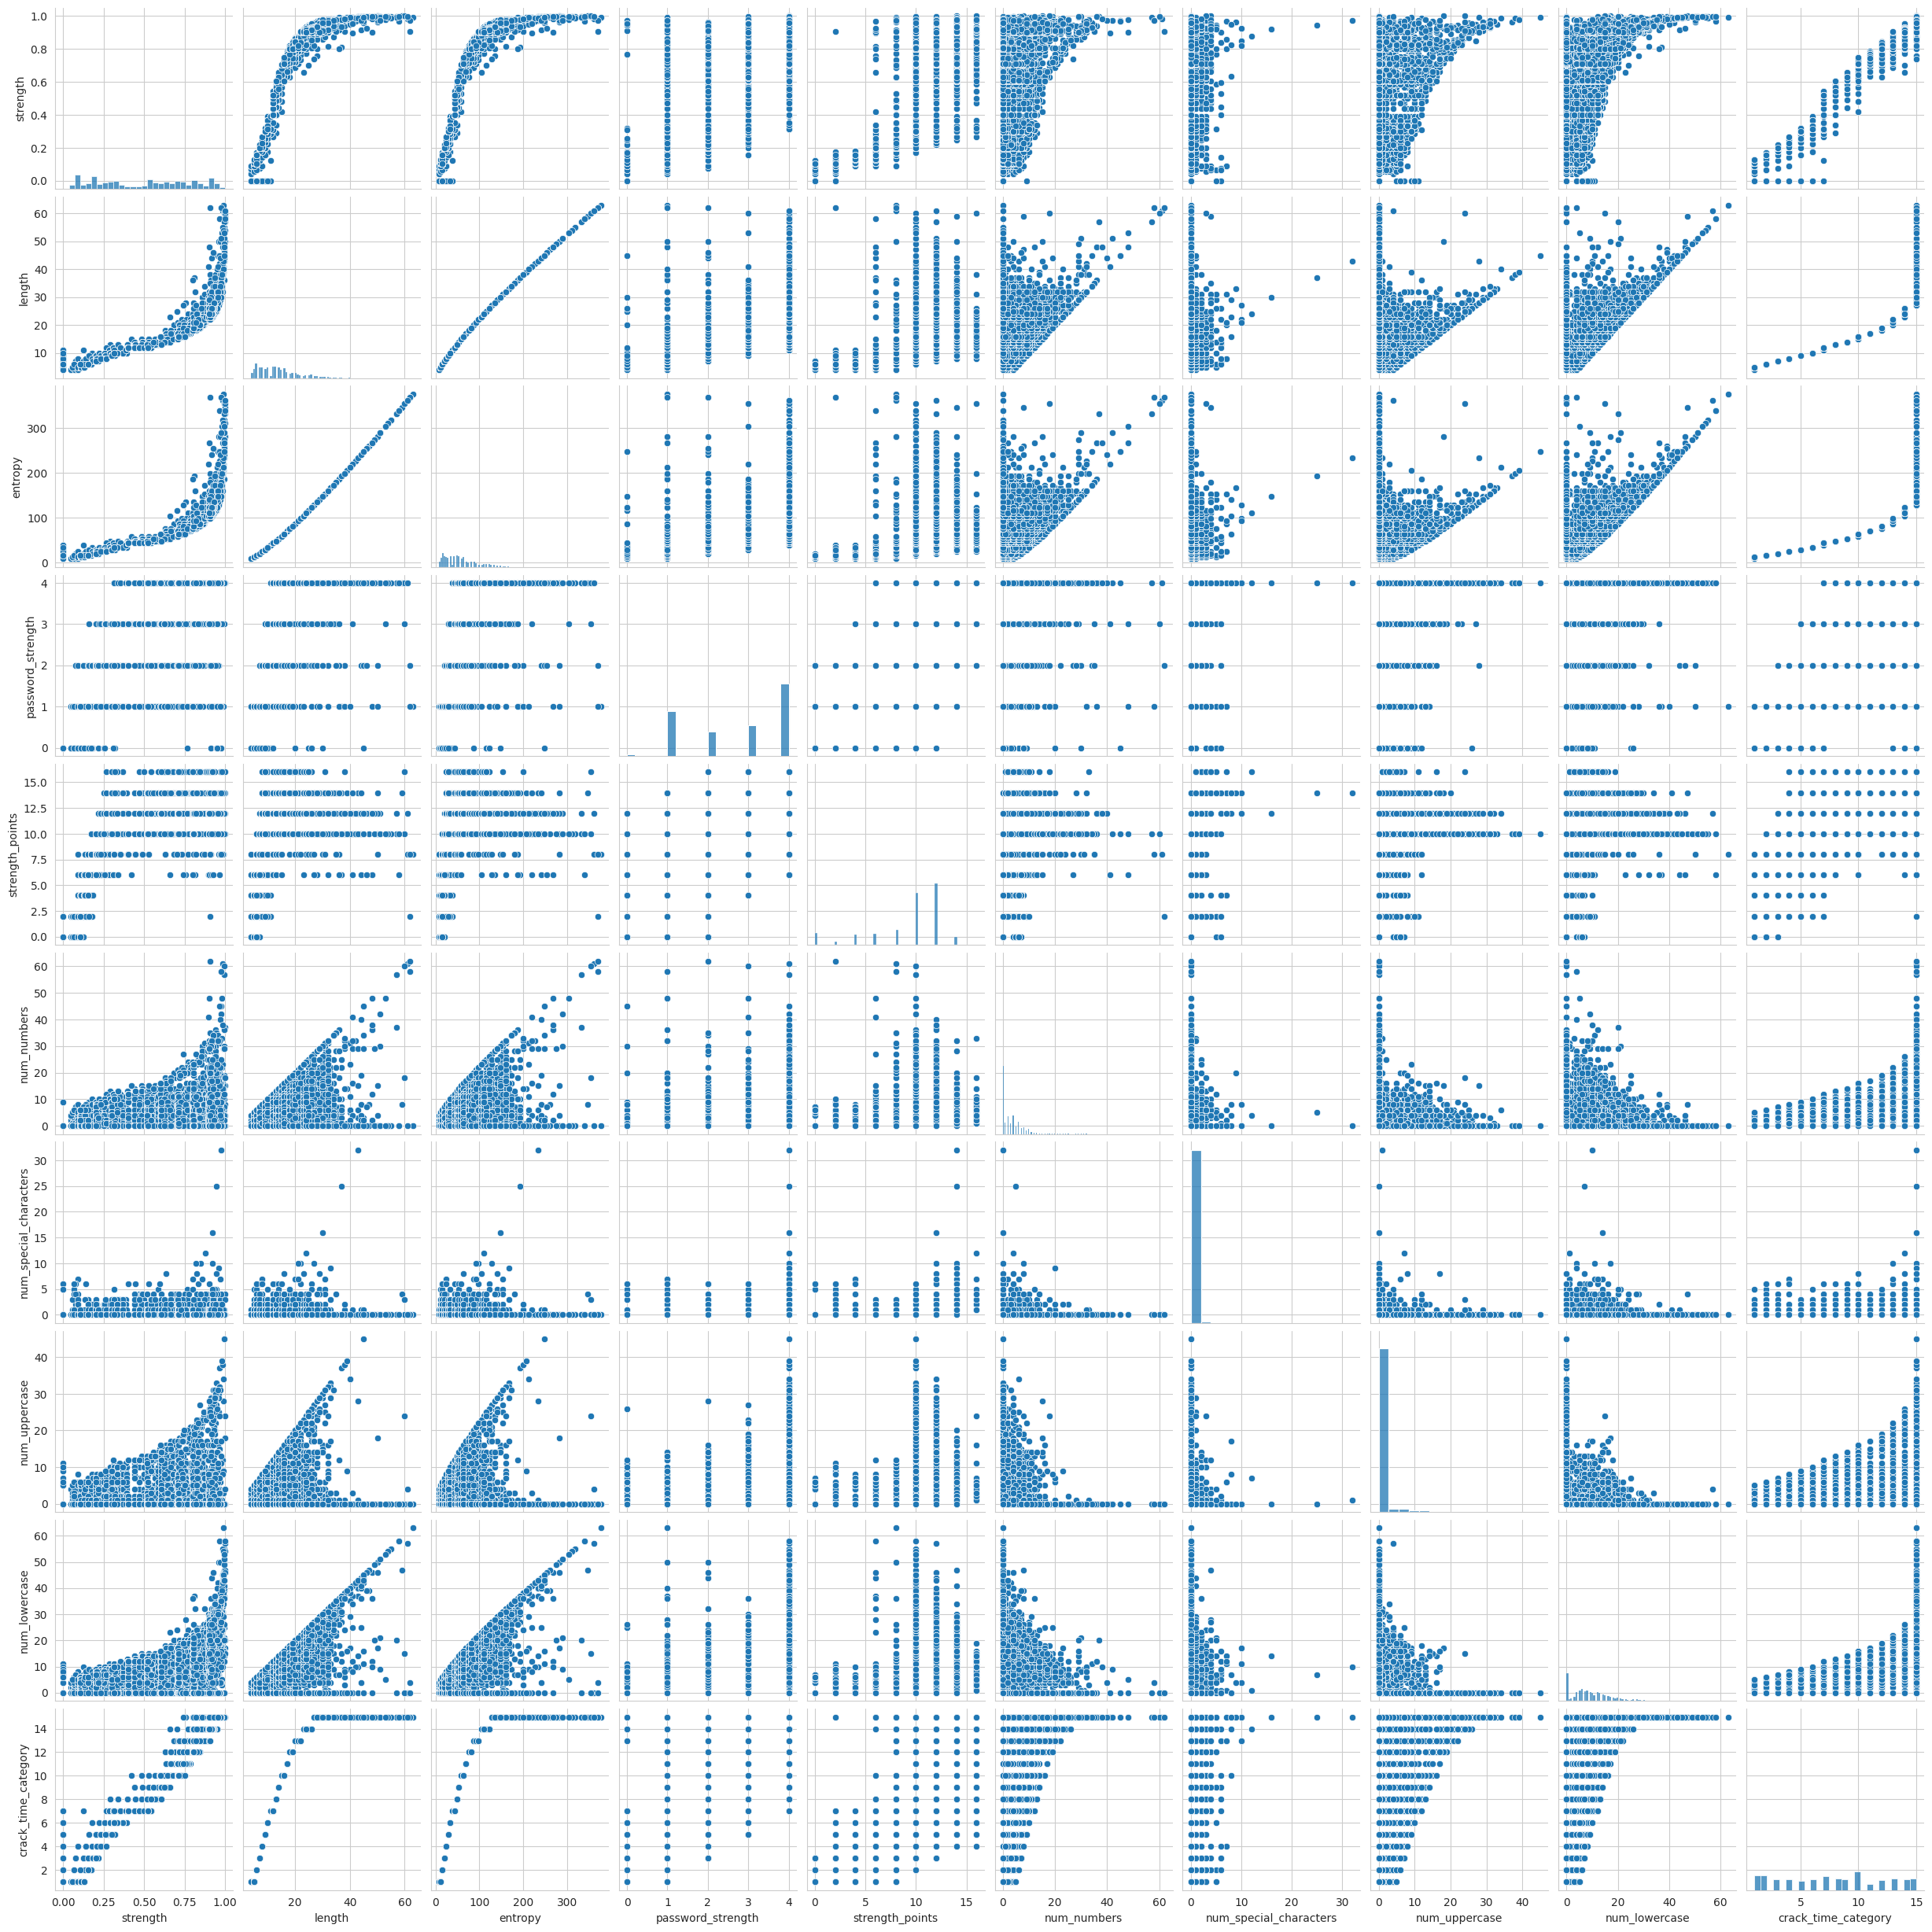

In [45]:
# Define a custom color palette
custom_palette = "husl"

# Create a pairplot and set the palette inside plot_kws
sns.pairplot(df,plot_kws={"palette": custom_palette})

# Display the pairplot
plt.show()

<Figure size 1500x1500 with 0 Axes>

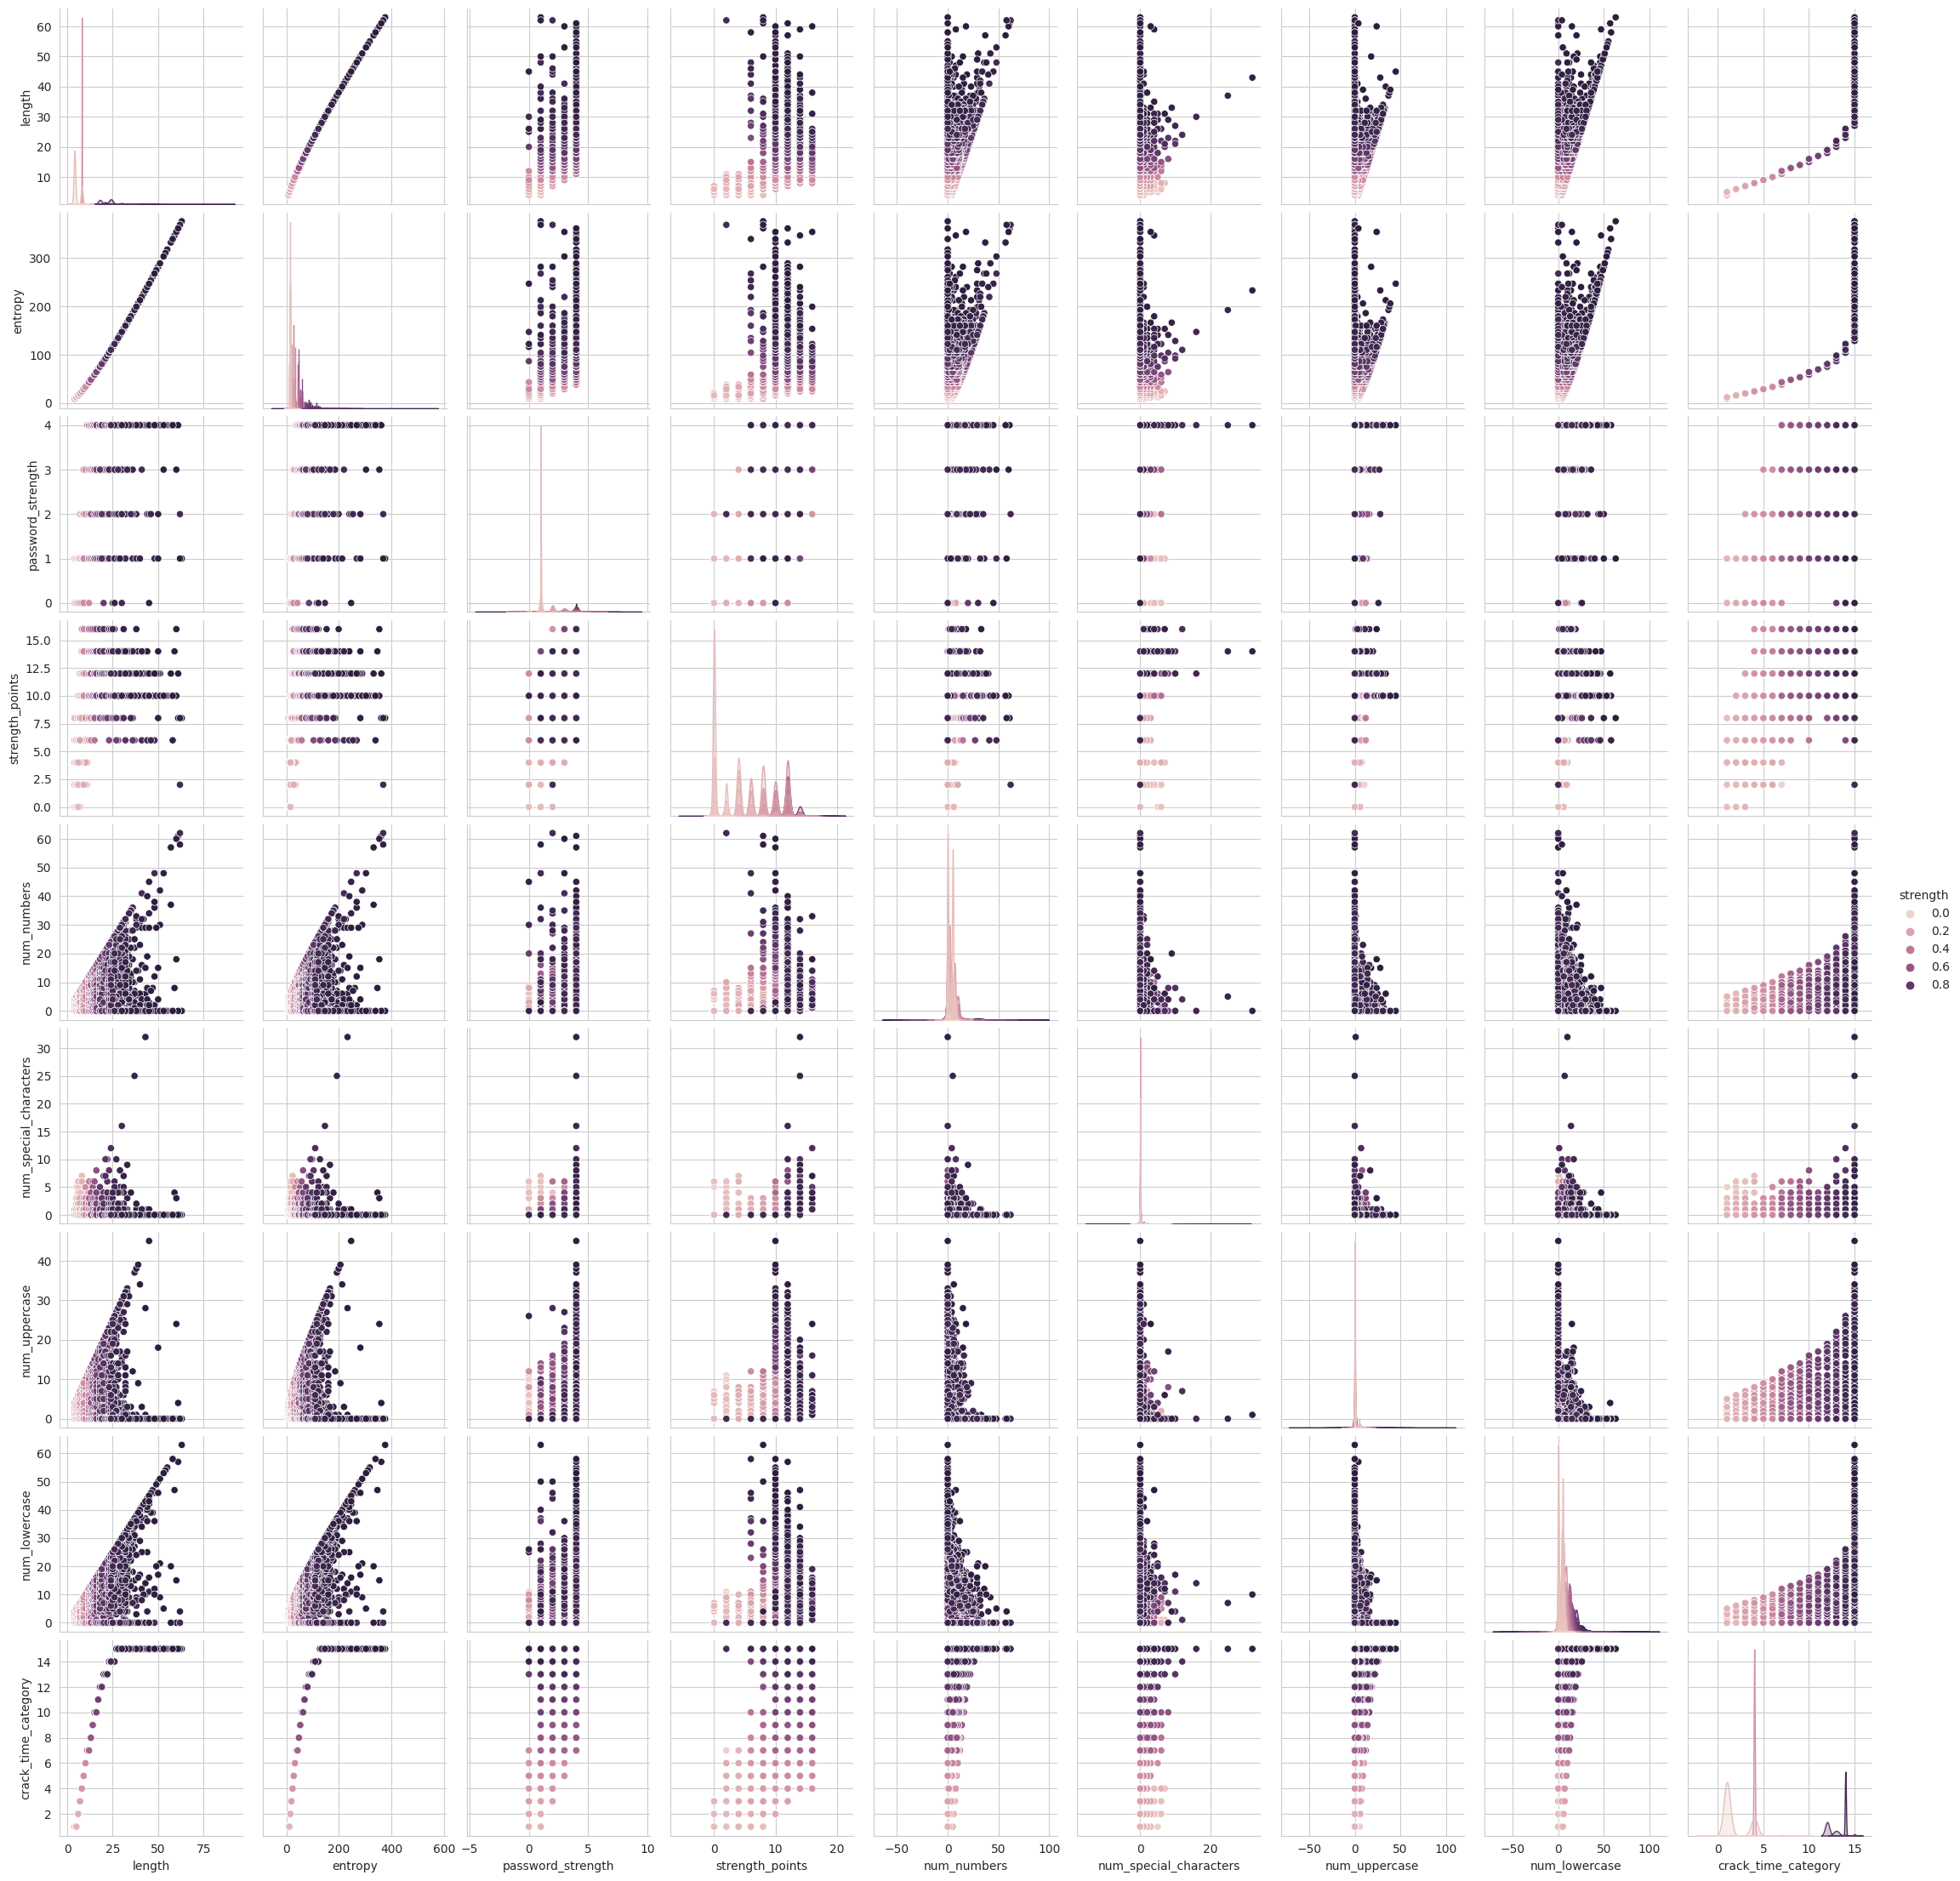

In [46]:
# Create a pairplot to visualize pairwise relationships between numerical columns
plt.figure(figsize=(15, 15))

# Use 'kde' for diagonal plots to show kernel density estimates
# Apply a custom color palette to the plot
# Assign colors to data points based on the 'strength' column
sns.pairplot(df, diag_kind='kde', plot_kws={"palette": custom_palette}, hue='strength')

# Display the pairplot
plt.show()

# TrainTheData

## One hot encoding

In [47]:
# Performing one-hot encoding to convert categorical columns into numerical ones
df_onehot = pd.get_dummies(df, columns=categorical_columns)

# Displaying the first few rows of the resulting DataFrame with one-hot encoding
df_onehot.head()

,strength,length,entropy,password_strength,strength_points,num_numbers,num_special_characters,num_uppercase,num_lowercase,crack_time_category,...,crack_time_3.00 hours,crack_time_313678.00 centuries,crack_time_4.00 centuries,crack_time_4.00 minutes,crack_time_4.00 months,crack_time_5.00 seconds,crack_time_6240.00 centuries,crack_time_8.00 years,crack_time_Eternity,crack_time_instant
0,0.0880534722,5,11.6096404744,1,0,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0888888888,4,8.0000000000,1,6,2,0,0,2,1,...,0,0,0,0,0,0,0,0,0,1
2,0.0888888888,4,8.0000000000,1,4,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.0704427777,4,8.0000000000,1,0,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.0888888888,4,8.0000000000,1,4,0,0,0,4,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_onehot.columns

Index(['strength', 'length', 'entropy', 'password_strength', 'strength_points',
       'num_numbers', 'num_special_characters', 'num_uppercase',
       'num_lowercase', 'crack_time_category', 'class_strength_Average',
       'class_strength_Strong', 'class_strength_Very strong',
       'class_strength_Very week', 'class_strength_Week',
       'crack_time_133.00 centuries', 'crack_time_3.00 days',
       'crack_time_3.00 hours', 'crack_time_313678.00 centuries',
       'crack_time_4.00 centuries', 'crack_time_4.00 minutes',
       'crack_time_4.00 months', 'crack_time_5.00 seconds',
       'crack_time_6240.00 centuries', 'crack_time_8.00 years',
       'crack_time_Eternity', 'crack_time_instant'],
      dtype='object')

## Scale data


In [49]:
# Multiply the 'strength' column by 100 to scale it
df_onehot['strength'] = df_onehot['strength'] * 100

In [50]:
# Separating the features (X) and the target variable (y)
X = df_onehot.drop('strength', axis=1)  # X contains all columns except 'strength'
y = df_onehot['strength']  # y contains the 'strength' column

In [51]:
# Splitting the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target values for training
# y_test: Target values for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train

,length,entropy,password_strength,strength_points,num_numbers,num_special_characters,num_uppercase,num_lowercase,crack_time_category,class_strength_Average,...,crack_time_3.00 hours,crack_time_313678.00 centuries,crack_time_4.00 centuries,crack_time_4.00 minutes,crack_time_4.00 months,crack_time_5.00 seconds,crack_time_6240.00 centuries,crack_time_8.00 years,crack_time_Eternity,crack_time_instant
5127,7,19.6514844544,2,6,0,0,0,7,3,0,...,0,0,0,0,0,0,0,0,0,1
20878,21,92.2386658784,4,12,6,0,0,15,13,0,...,0,0,0,0,0,0,0,0,1,0
9870,9,28.5293250130,2,12,1,0,0,8,5,0,...,0,0,0,0,0,0,0,0,0,1
14921,13,48.1057163358,4,12,3,0,0,10,8,1,...,0,0,0,0,0,0,0,0,0,0
9842,10,33.2192809489,3,8,10,0,0,0,6,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,33,166.4650059388,4,12,1,0,32,0,15,0,...,0,0,0,0,0,0,0,0,1,0
5421,7,19.6514844544,2,6,0,0,0,7,3,0,...,0,0,0,0,0,0,0,0,0,1
869,7,19.6514844544,1,0,7,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
17087,14,53.3029689088,4,10,0,0,0,14,9,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler only on the numerical columns of the training set
scaler.fit(X_train[numerical_cols])

# Transform only those columns for both the training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [54]:
X_train_scaled.head()

,length,entropy,password_strength,strength_points,num_numbers,num_special_characters,num_uppercase,num_lowercase,crack_time_category,class_strength_Average,...,crack_time_3.00 hours,crack_time_313678.00 centuries,crack_time_4.00 centuries,crack_time_4.00 minutes,crack_time_4.00 months,crack_time_5.00 seconds,crack_time_6240.00 centuries,crack_time_8.00 years,crack_time_Eternity,crack_time_instant
5127,0.0508474576,0.0316127943,0.5000000000,0.3750000000,0.0000000000,0.0000000000,0.0000000000,0.1111111111,0.1428571429,0,...,0,0,0,0,0,0,0,0,0,1
20878,0.2881355932,0.2285562520,1.0000000000,0.7500000000,0.0967741935,0.0000000000,0.0000000000,0.2380952381,0.8571428571,0,...,0,0,0,0,0,0,0,0,1,0
9870,0.0847457627,0.0557001412,0.5000000000,0.7500000000,0.0161290323,0.0000000000,0.0000000000,0.1269841270,0.2857142857,0,...,0,0,0,0,0,0,0,0,0,1
14921,0.1525423729,0.1088147838,1.0000000000,0.7500000000,0.0483870968,0.0000000000,0.0000000000,0.1587301587,0.5000000000,1,...,0,0,0,0,0,0,0,0,0,0
9842,0.1016949153,0.0684249243,0.7500000000,0.5000000000,0.1612903226,0.0000000000,0.0000000000,0.0000000000,0.3571428571,0,...,0,0,0,0,0,1,0,0,0,0


## KNN Regression

In [55]:
# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors as needed
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Initialize GridSearchCV with the scoring metric you want to optimize (e.g., R-squared)
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_p = grid_search.best_params_['p']

# Create a new KNN regression model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the best model to the data
best_knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the metrics for the best KNN model
print("For the Best K-nearest Neighbors Regression:")
print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p value: {best_p}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R-squared (R2): {r2_knn}")

For the Best K-nearest Neighbors Regression:
Best number of neighbors: 9
Best weights: distance
Best p value: 1
Mean Absolute Error (MAE): 1.2848698834636474
Mean Squared Error (MSE): 3.582999518962974
Root Mean Squared Error (RMSE): 1.8928812743970431
R-squared (R2): 0.9956029737707988


In [56]:
print("min value: ",min(df_onehot['strength']))
print("mean value:",df_onehot['strength'].mean())
print("max value: ",max(df_onehot['strength']))

min value:  0.0
mean value: 49.96943013378068
max value:  99.94797814398908
